# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
#Importando as bibliotecas que serão utilizadas nas analises.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set_theme()
%matplotlib inline

In [2]:
#Importando os dados CSV.

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

In [3]:
#Verifica-se que não existe uma grande correlação entre a renda e a posse de veiculo ou entre a renda e a posse de imovel.

df[['renda', 'posse_de_veiculo', 'posse_de_imovel']].corr()

,renda,posse_de_veiculo,posse_de_imovel
renda,1.000000,0.063414,0.029827
posse_de_veiculo,0.063414,1.000000,-0.014727
posse_de_imovel,0.029827,-0.014727,1.000000


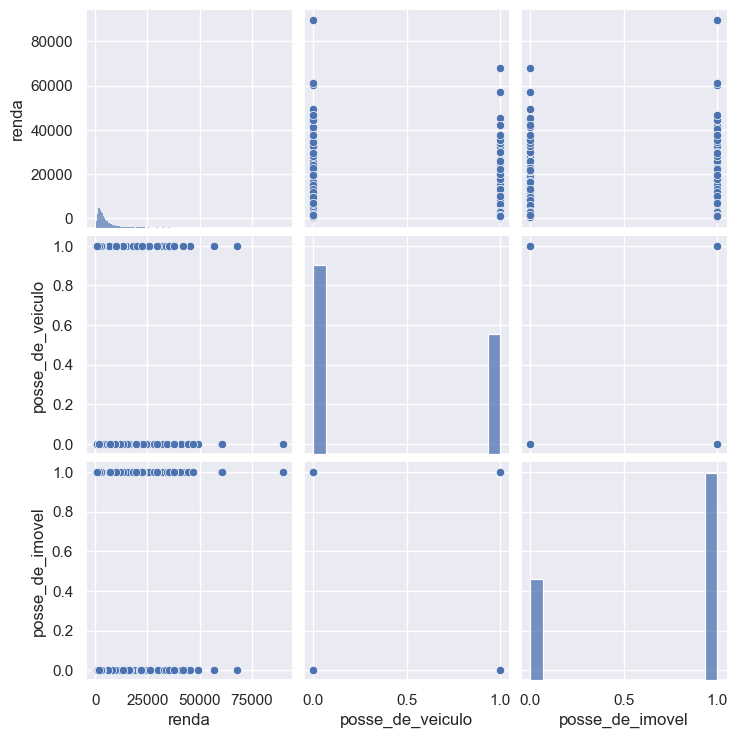

In [4]:
#Usando o pairplot, não é possivel afirmar muito sobre os dados, talvez identificar a presença de um outlier ou outros.

sns.pairplot(df[['renda', 'posse_de_veiculo', 'posse_de_imovel']])

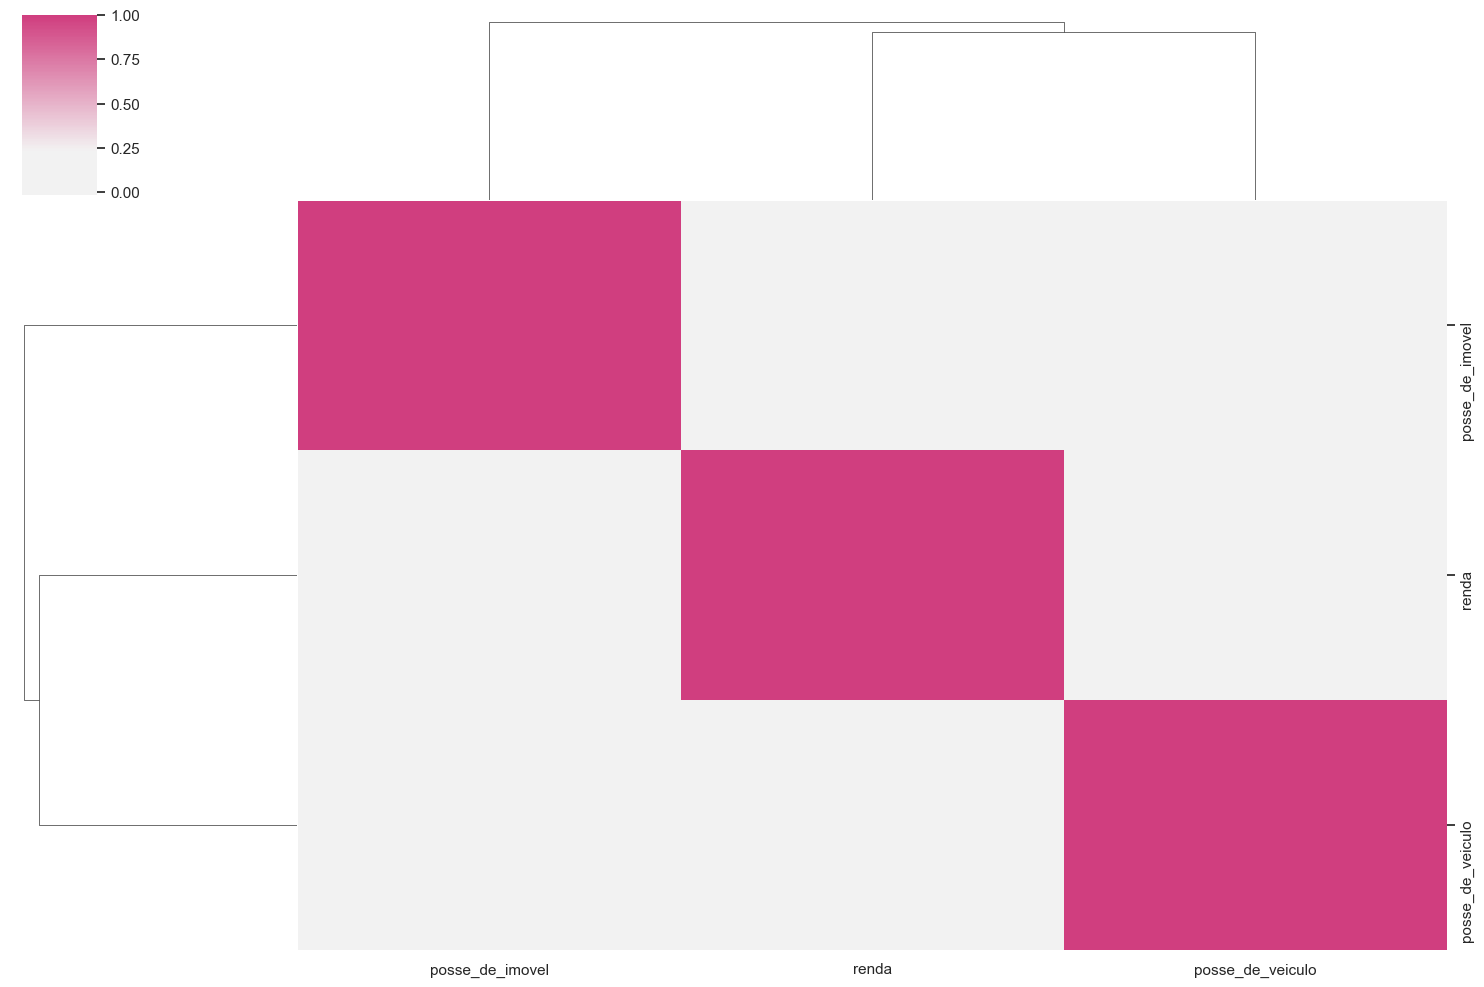

In [5]:
#O clustermap confirmar a falta de correlação entre essas variáveis.

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(df[['renda', 'posse_de_veiculo', 'posse_de_imovel']].corr(), figsize=[15,10], center=0, cmap=cmap)

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

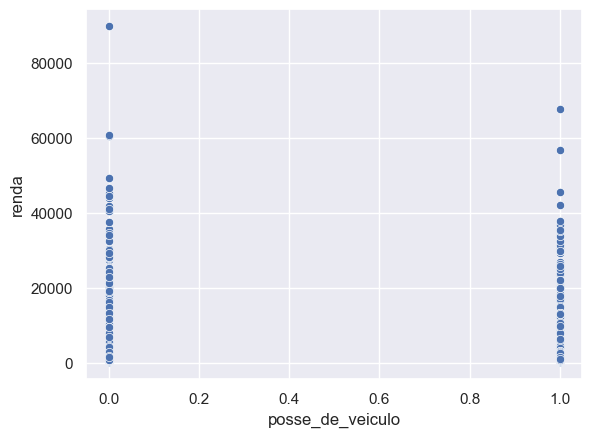

In [6]:
#Os gráficos de distribuíção também não nos auxilia em muito.

sns.scatterplot(data=df, x='posse_de_veiculo', y='renda')

<Axes: xlabel='posse_de_imovel', ylabel='renda'>

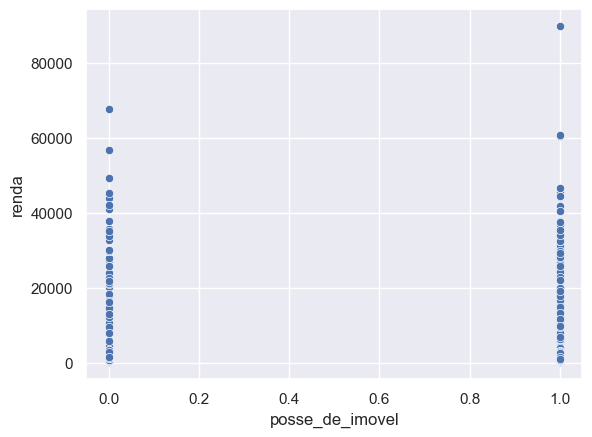

In [7]:
sns.scatterplot(data=df, x='posse_de_imovel', y='renda')

In [8]:
#Como os outros acima, o gráfico em escala logaritmica não nos auxilia tanto.

df_log = df.copy()
df_log['renda_log'] = np.log(df_log['renda'])

<Axes: xlabel='posse_de_veiculo', ylabel='renda_log'>

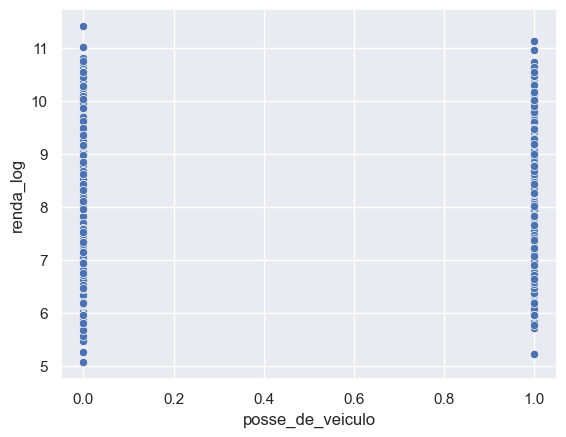

In [9]:
sns.scatterplot(x='posse_de_veiculo', y='renda_log', data=df_log)

In [10]:
#Com outra abordagem, separando a renda em intervalos menores para verificar se dentro dos intervalos existe alguma tendência de acréscimo ou decrescimo entre as variáveis.

renda_cut = pd.qcut(df['renda'], 10)

In [13]:
#O pivot_table verifica a média e o desvio padrão.

pivot = df.pivot_table(
    values=['posse_de_veiculo', 'posse_de_imovel'],
    index=[renda_cut],
    aggfunc=['mean', 'std']
)

/var/folders/32/kwgsty_91mgcby362gfpdsr80000gn/T/ipykernel_2831/174697620.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(
/var/folders/32/kwgsty_91mgcby362gfpdsr80000gn/T/ipykernel_2831/174697620.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


In [14]:
#A partir da tabela, notamos que existe alguma correlação com as faixas de renda e a posse de veículo.

pivot

mean                              std  \
                     posse_de_imovel posse_de_veiculo posse_de_imovel   
renda                                                                   
(159.899, 1221.734]         0.621333         0.292667        0.485217   
(1221.734, 1714.42]         0.638907         0.343105        0.480477   
(1714.42, 2182.39]          0.666667         0.387333        0.471562   
(2182.39, 2684.038]         0.675784         0.355570        0.468237   
(2684.038, 3278.26]         0.695536         0.397069        0.460333   
(3278.26, 3995.242]         0.676451         0.392262        0.467986   
(3995.242, 4983.49]         0.676647         0.411843        0.467912   
(4983.49, 6448.296]         0.678023         0.420842        0.467390   
(6448.296, 9344.657]        0.674667         0.421333        0.468656   
(9344.657, 89918.04]        0.717333         0.466667        0.450446   

                                       
                     posse_de_veiculo  
renda                                  
(159.899, 1221.734]          0.455138  
(1221.734, 1714.42]          0.474904  
(1714.42, 2182.39]           0.487303  
(2182.39, 2684.038]          0.478846  
(2684.038, 3278.26]          0.489454  
(3278.26, 3995.242]          0.488417  
(3995.242, 4983.49]          0.492331  
(4983.49, 6448.296]          0.493859  
(6448.296, 9344.657]         0.493937  
(9344.657, 89918.04]         0.499054

/var/folders/32/kwgsty_91mgcby362gfpdsr80000gn/T/ipykernel_2831/1961873075.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_1 = df.pivot_table(


<Axes: xlabel='renda'>

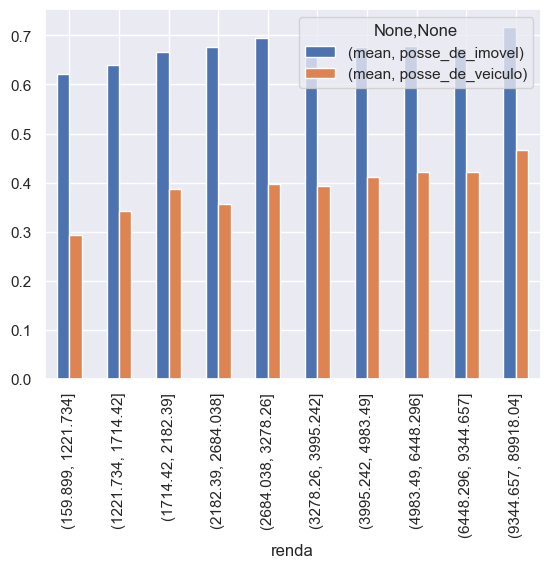

In [15]:
#A partir do gráfico de barras, torna-se mais evidente uma correlação positiva entre as variáveis, posse_de_veiculo e posse_de_imovel, com a variável renda.

pivot_1 = df.pivot_table(
    values=['posse_de_veiculo', 'posse_de_imovel'],
    index=[renda_cut],
    aggfunc=['mean'])

pivot_1.plot.bar()

In [16]:
#Com intuito de complementar a análise, criei uma nova variável no banco de dados que é a porcentagem da renda.

df['renda_pct'] = (df['renda'] / df['renda'].sum())

<Axes: xlabel='posse_de_veiculo', ylabel='renda_pct'>

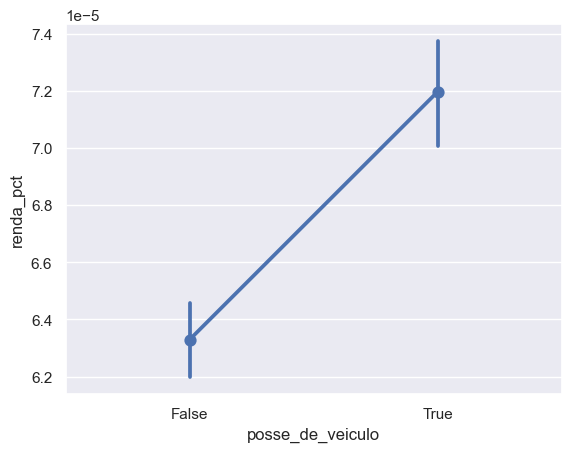

In [17]:
#Com o pointplot verificar-se que o erro padrão é bem baixo, considerando um intervalo de confiança de 95%, o que leva a conclusão de que a média da renda não apresenta muita variação.

sns.pointplot(x='posse_de_veiculo', y='renda_pct', data=df, dodge=True, errorbar=('ci', 95))

<Axes: xlabel='posse_de_imovel', ylabel='renda_pct'>

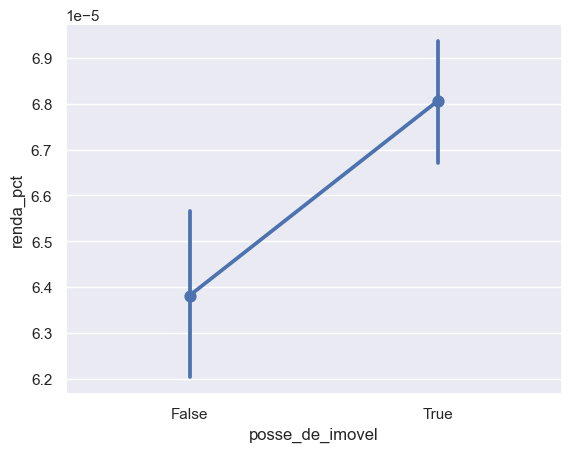

In [18]:
sns.pointplot(x='posse_de_imovel', y='renda_pct', data=df, dodge=True, errorbar=('ci', 95))